In [1]:
import json
import math
import os
from collections import defaultdict

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches, patheffects, text

In [2]:
# !wget https://storage.googleapis.com/mediapipe-tasks/object_detector/android_figurine.zip
# !unzip android_figurine.zip
# train_dataset_path = "android_figurine/train"
# validation_dataset_path = "android_figurine/validation"

train_dataset_path = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train"
validation_dataset_path = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/validation"

with open(os.path.join(train_dataset_path, "labels.json"), "r") as f:
    labels_json = json.load(f)

for category_item in labels_json["categories"]:
    print(f"{category_item['id']}: {category_item['name']}")

0: background
1: card


In [ ]:
# def urmum(max_examples=9):
#     with open(os.path.join(train_dataset_path, "labels.json"), "r") as f:
#         labels_json = json.load(f)

#     images = labels_json["images"]
#     cat_id_to_label = {item["id"]: item["name"] for item in labels_json["categories"]}

#     image_annots = defaultdict(list)
#     for annotation_obj in labels_json["annotations"]:
#         image_id = annotation_obj["image_id"]
#         # print(f"image_id: {image_id}, annotation_obj: {annotation_obj}")
#         image_annots[image_id].append(annotation_obj)

#     # aa = image_annots.items()
#     # bb = list(aa)[:max_examples]

#     n_rows = math.ceil(max_examples / 3)
#     _, axs = plt.subplots(n_rows, 3, figsize=(24, n_rows * 8))  # 3 columns(2nd index), 8x8 for each image
#     fig, ax = plt.subplots(1)

#     for ind, (image_id, annotations_list) in enumerate(list(image_annots.items())[:max_examples]):
#         ax = axs[ind // 3, ind % 3]  # ax: matplotlib.axes._axes.Axes
#         # print(f"ind: {ind}, image_id: {image_id}, annotations_list: {annotations_list}, ax: {ax}")

#         img = plt.imread(os.path.join(train_dataset_path, "images", images[image_id]["file_name"]))
#         ax.imshow(img)

#         for annotation in annotations_list:
#             bbox = annotation["bbox"]
#             patch = ax.add_patch(patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor="red", lw=2))
#             patch.set_path_effects([patheffects.Stroke(linewidth=4, foreground="black"), patheffects.Normal()])

#             # text = ax.text(bbox[0], (bbox[1] - img.shape[0] * 0.05), cat_id_to_label[annotation["category_id"]], verticalalignment="top", color="white", fontsize=10, weight="bold")
#             # text = ax.text(bbox[0], (bbox[1] - img.shape[0] * 0.05), annotation[], verticalalignment="top", color="white", fontsize=10)
#             # text.set_path_effects([patheffects.Stroke(linewidth=4, foreground="black"), patheffects.Normal()])

#     plt.show()


# urmum(4)
# # visualize(train_dataset_path, 4)

In [ ]:
from numpy import imag


def draw_outline(obj):
    obj.set_path_effects([patheffects.Stroke(linewidth=4, foreground="black"), patheffects.Normal()])


def draw_box(ax, bb):
    patch = ax.add_patch(patches.Rectangle((bb[0], bb[1]), bb[2], bb[3], fill=False, edgecolor="red", lw=2))
    draw_outline(patch)


def draw_text(ax, bb, txt, disp):
    text = ax.text(bb[0], (bb[1] - disp), txt, verticalalignment="top", color="white", fontsize=10, weight="bold")
    draw_outline(text)


def draw_bbox(ax, annotations_list, id_to_label, image_shape):
    for annotation in annotations_list:
        cat_id = annotation["category_id"]
        bbox = annotation["bbox"]
        draw_box(ax, bbox)
        draw_text(ax, bbox, id_to_label[cat_id], image_shape[0] * 0.05)


def visualize(dataset_folder, max_examples=None):
    with open(os.path.join(dataset_folder, "labels.json"), "r") as f:
        labels_json = json.load(f)

    images = labels_json["images"]
    cat_id_to_label = {item["id"]: item["name"] for item in labels_json["categories"]}

    image_annots = defaultdict(list)
    for annotation_obj in labels_json["annotations"]:
        image_id = annotation_obj["image_id"]
        image_annots[image_id].append(annotation_obj)

    if max_examples is None:
        max_examples = len(image_annots.items())

    n_rows = math.ceil(max_examples / 3)
    fig, axs = plt.subplots(n_rows, 3, figsize=(24, n_rows * 8))  # 3 columns(2nd index), 8x8 for each image

    for image_id, annotations_list in image_annots.items():
        img_path = os.path.join(dataset_folder, "images", images[image_id]["file_name"])
        print(img_path)
        print(image_id, annotations_list)
        # img = plt.imread(img_path)

    # for ind, (image_id, annotations_list) in enumerate(list(image_annots.items())[:max_examples]):
    #     ax = axs[ind // 3, ind % 3]
    #     img = plt.imread(os.path.join(dataset_folder, "images", images[image_id]["file_name"]))
    #     # ax.imshow(img)
    #     # draw_bbox(ax, annotations_list, cat_id_to_label, img.shape)

    # plt.show()


visualize(train_dataset_path, 9)

In [3]:
labels_json_path = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train/labels.json"
with open(labels_json_path, "r") as f:
    labels_json = json.load(f)

images_json = labels_json["images"]
annotations_json = labels_json["annotations"]
# categories_json = labels_json["categories"]

image_annotation_mapping = {}
for image in images_json:
    image_id = image["id"]
    image_annotation_mapping[image_id] = {
        "file_name": image["file_name"],
        "annotations": [],
        # "annotations": [annotation for annotation in annotations_json if annotation["image_id"] == image_id]
    }

    for annotation in annotations_json:
        if annotation["image_id"] == image_id:
            image_annotation_mapping[image_id]["annotations"].append(annotation)

# print(json.dumps(image_annotation_mapping, indent=4))

1 {'file_name': 'img1.jpg', 'annotations': [{'image_id': 1, 'category_id': 1, 'bbox': [783.0, 760.0, 1312.0, 1795.0]}]}
10 {'file_name': 'img10.jpg', 'annotations': [{'image_id': 10, 'category_id': 1, 'bbox': [674.0, 1016.0, 1516.0, 1567.0]}]}
11 {'file_name': 'img11.jpg', 'annotations': [{'image_id': 11, 'category_id': 1, 'bbox': [250.0, 1298.0, 1484.0, 1970.0]}]}
13 {'file_name': 'img13.jpg', 'annotations': [{'image_id': 13, 'category_id': 1, 'bbox': [464.0, 1014.0, 1743.0, 1899.0]}]}
14 {'file_name': 'img14.jpg', 'annotations': [{'image_id': 14, 'category_id': 1, 'bbox': [1580.7, 2201.9, 1169.3, 1076.1]}, {'image_id': 14, 'category_id': 1, 'bbox': [981.5, 1730.9, 1017.7, 891.2]}, {'image_id': 14, 'category_id': 1, 'bbox': [2190.1, 1536.9, 808.9, 790.1]}, {'image_id': 14, 'category_id': 1, 'bbox': [1581.5, 1157.3, 884.5, 621.8]}, {'image_id': 14, 'category_id': 1, 'bbox': [553.2, 1303.9, 886.4, 692.0]}, {'image_id': 14, 'category_id': 1, 'bbox': [1074.3, 823.1, 797.2, 532.4]}, {'imag

/var/folders/jz/x4r1213x41bfgcjs258lv9dw0000gp/T/ipykernel_83687/1358080846.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1)


5 {'file_name': 'img5.jpg', 'annotations': [{'image_id': 5, 'category_id': 1, 'bbox': [727.0, 990.0, 1280.0, 1769.0]}]}
6 {'file_name': 'img6.jpg', 'annotations': [{'image_id': 6, 'category_id': 1, 'bbox': [835.0, 1051.0, 1190.0, 1603.0]}]}
8 {'file_name': 'img8.jpg', 'annotations': [{'image_id': 8, 'category_id': 1, 'bbox': [695.5, 1045.5, 1321.7, 1774.4]}]}
9 {'file_name': 'img9.jpg', 'annotations': [{'image_id': 9, 'category_id': 1, 'bbox': [268.0, 470.0, 1744.0, 1768.0]}]}


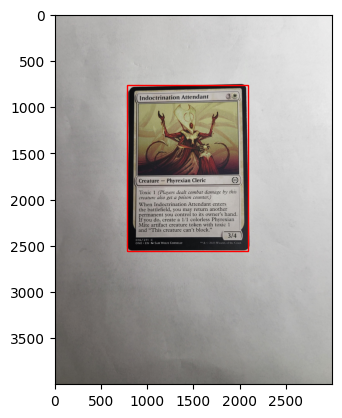

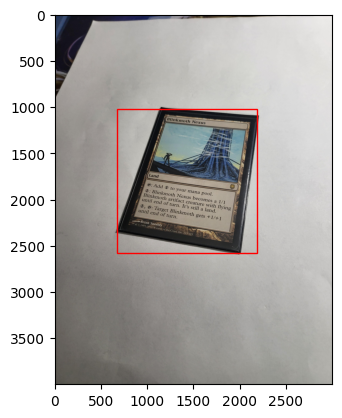

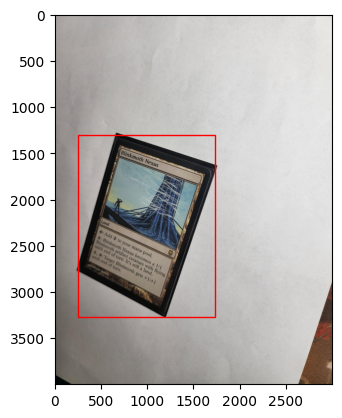

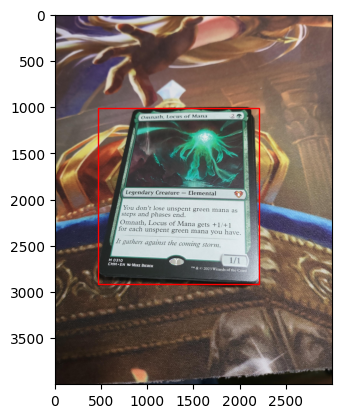

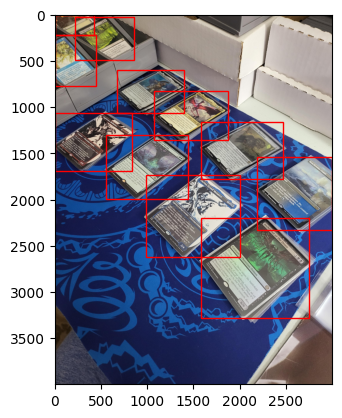

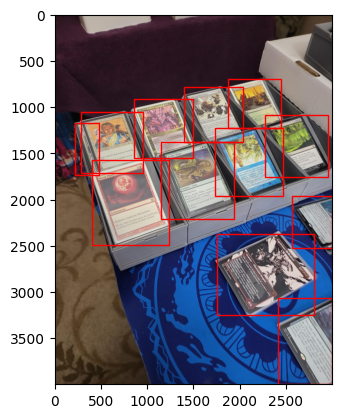

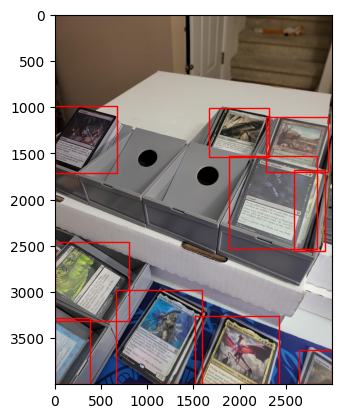

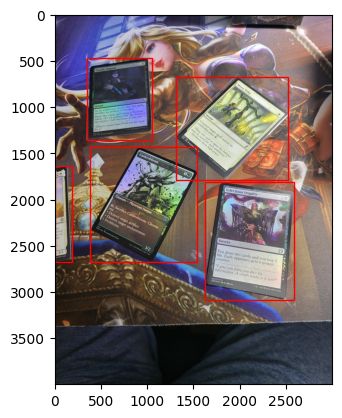

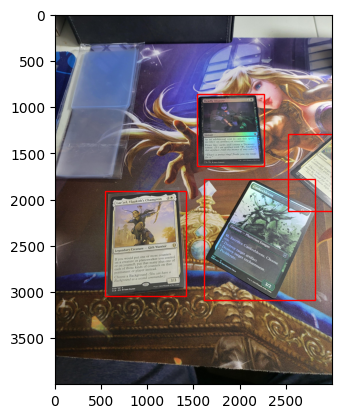

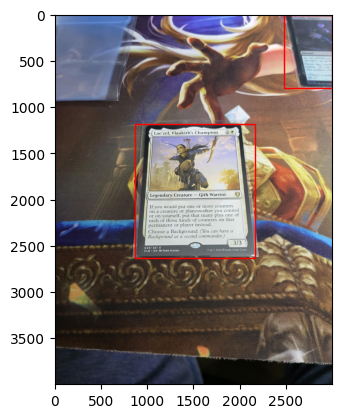

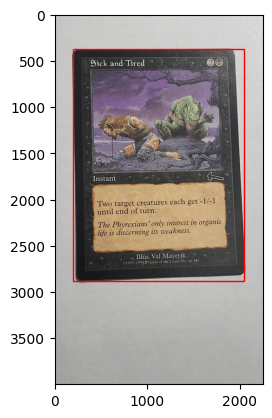

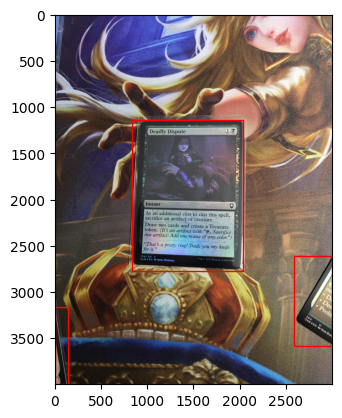

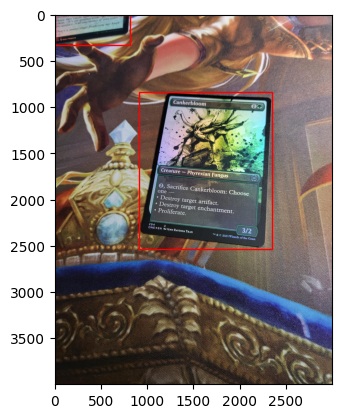

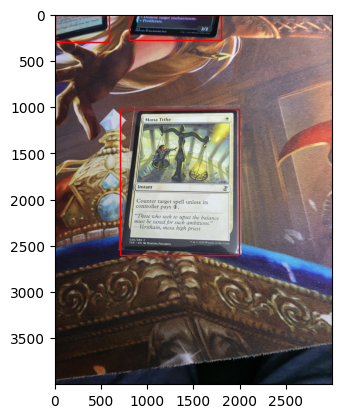

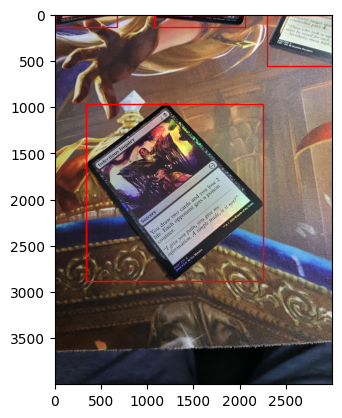

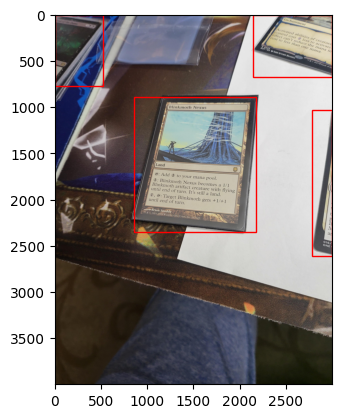

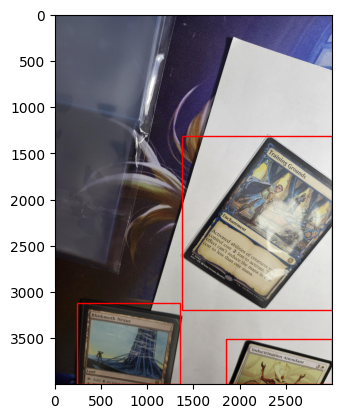

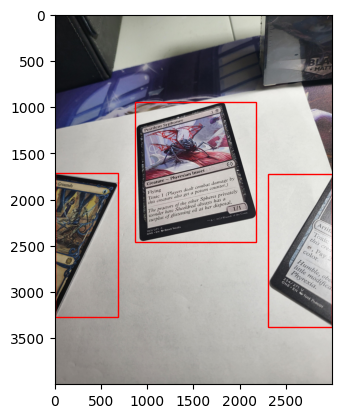

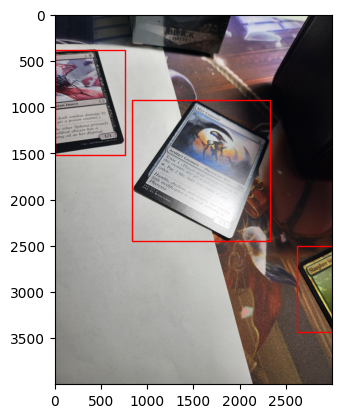

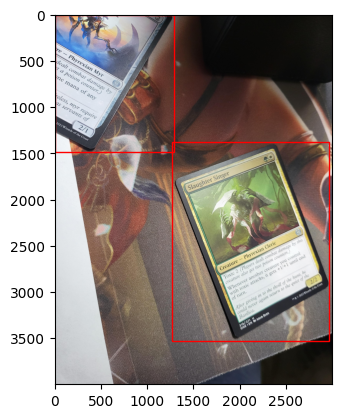

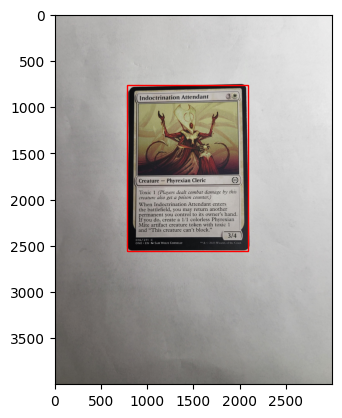

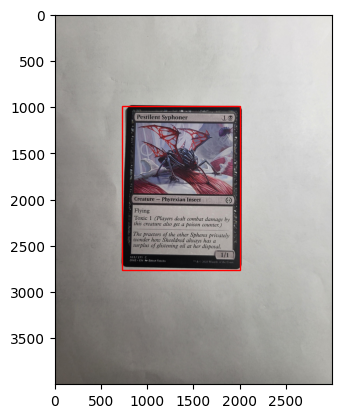

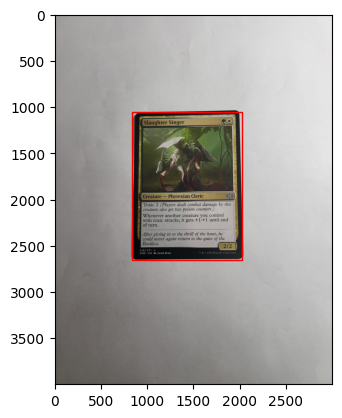

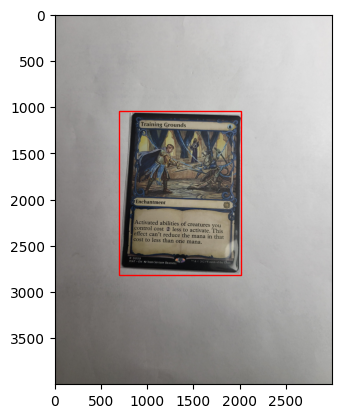

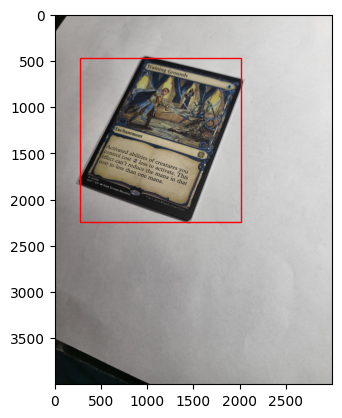

In [5]:
for image_id, image in image_annotation_mapping.items():
    print(image_id, image)

    bboxes = [annotation["bbox"] for annotation in image_annotation_mapping[image_id]["annotations"]]
    # print(bboxes)

    image = plt.imread(f"/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train/images/img{image_id}.jpg", format="jpg")
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for bbox in bboxes:
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor="r", facecolor="none")
        ax.add_patch(rect)

    plt.savefig(f"/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/tmp/img{image_id}.jpg", format="jpg")
    plt.close()
    # plt.show()

In [ ]:
# import glob
# from PIL import Image, ExifTags

# # old_img_path = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train/images/img15.jpg"
# # new_img_path = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train/images/img15_new.jpg"
# # images_dir = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/train/images"
# images_dir = "/Users/MRutkowski/src/collabomundo/mtg-card-scanner/images/data/validation/images"
# for filename in glob.glob(f"{images_dir}/*.jpg"):
#     print(f"filename: {filename}")

#     img = Image.open(filename)

#     orientation = None
#     for o in ExifTags.TAGS.keys():
#         if ExifTags.TAGS[o] == "Orientation":
#             orientation = o
#             break

#     if not orientation:
#         raise Exception("No orientation found")

#     exif = img._getexif()
#     if exif[orientation] == 3:
#         print("rotating 180")
#         img = img.rotate(180, expand=True)
#     elif exif[orientation] == 6:
#         print("rotating 270")
#         img = img.rotate(270, expand=True)
#     elif exif[orientation] == 8:
#         print("rotating 90")
#         img = img.rotate(90, expand=True)
#     else:
#         print("no rotation needed")

#     img.save(filename)